#### Get data from mongoDB

In [17]:
import sys
import os
sys.path.append(os.path.abspath('../ETL_pipeline'))
from get_data_from_cloud import get_dataframe_from_cloud
from dotenv import load_dotenv
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

load_dotenv()

# Get environment variables
MONGO_URI = os.getenv('MONGO_URI')
# Create a new client and connect to the server
client = MongoClient(MONGO_URI, server_api=ServerApi('1'))

## Code to plot emissions

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_emissions(data):
    co2_data_filtered = data

    # Select relevant columns for emissions analysis
    emissions_cols = ['country', 'year', 'co2', 'co2_per_capita', 'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2']
    emissions_data = co2_data_filtered[emissions_cols]

    # Group by country and calculate cumulative emissions since 1950
    cumulative_emissions = emissions_data.groupby('country')['co2'].sum().sort_values(ascending=False)

    # Get top 5 emitting countries
    top_emitters = cumulative_emissions.head(5).index.tolist()

    # Filter data for the top emitters
    top_emitters_data = emissions_data[emissions_data['country'].isin(top_emitters)]

    # Plot cumulative emissions for top emitters
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cumulative_emissions.loc[top_emitters].index, y=cumulative_emissions.loc[top_emitters].values)
    plt.title('Cumulative CO₂ Emissions (1950-Present)')
    plt.ylabel('Cumulative Emissions (Million Tonnes)')
    plt.xlabel('Region')
    plt.xticks(rotation=45)
    plt.show()

    # Line plot for emissions over time for top emitters
    plt.figure(figsize=(14, 8))
    for country in top_emitters:
        country_data = top_emitters_data[top_emitters_data['country'] == country]
        plt.plot(country_data['year'], country_data['co2'], label=country)

    plt.legend(title='Country', loc='upper left')  # Customize location and title of legend
    plt.title('CO₂ Emissions Over Time for Top 5 Emitters')
    plt.ylabel('Annual CO₂ Emissions (Million Tonnes)')
    plt.xlabel('Year')
    plt.show()

### EDA most emissions, all regions

In [19]:
df = get_dataframe_from_cloud(client=client, db_name="data", collection_name="emissions")

Pinged your deployment. You successfully connected to MongoDB!


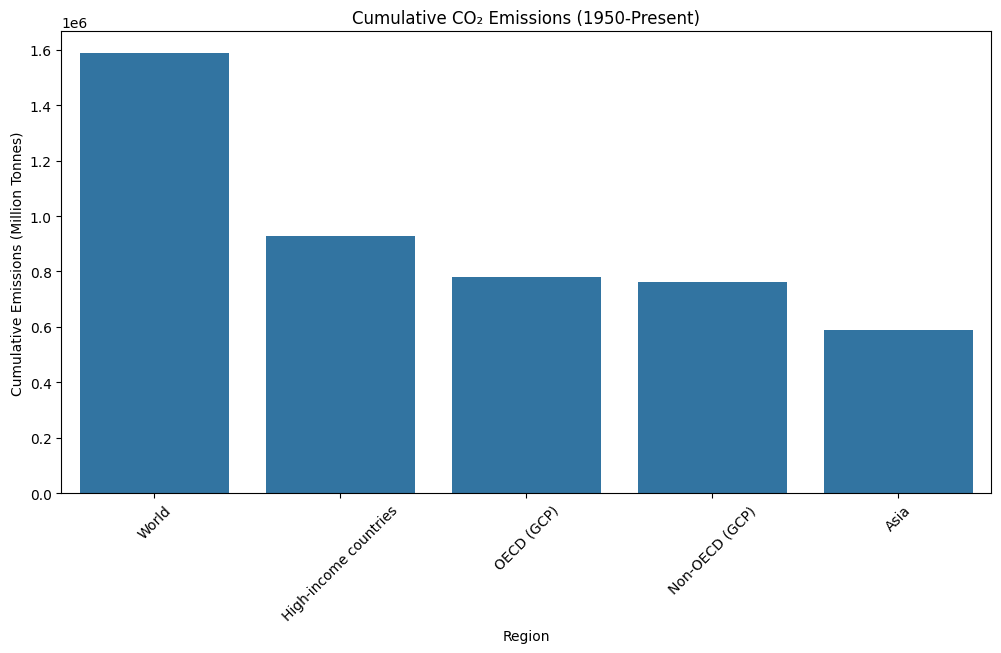

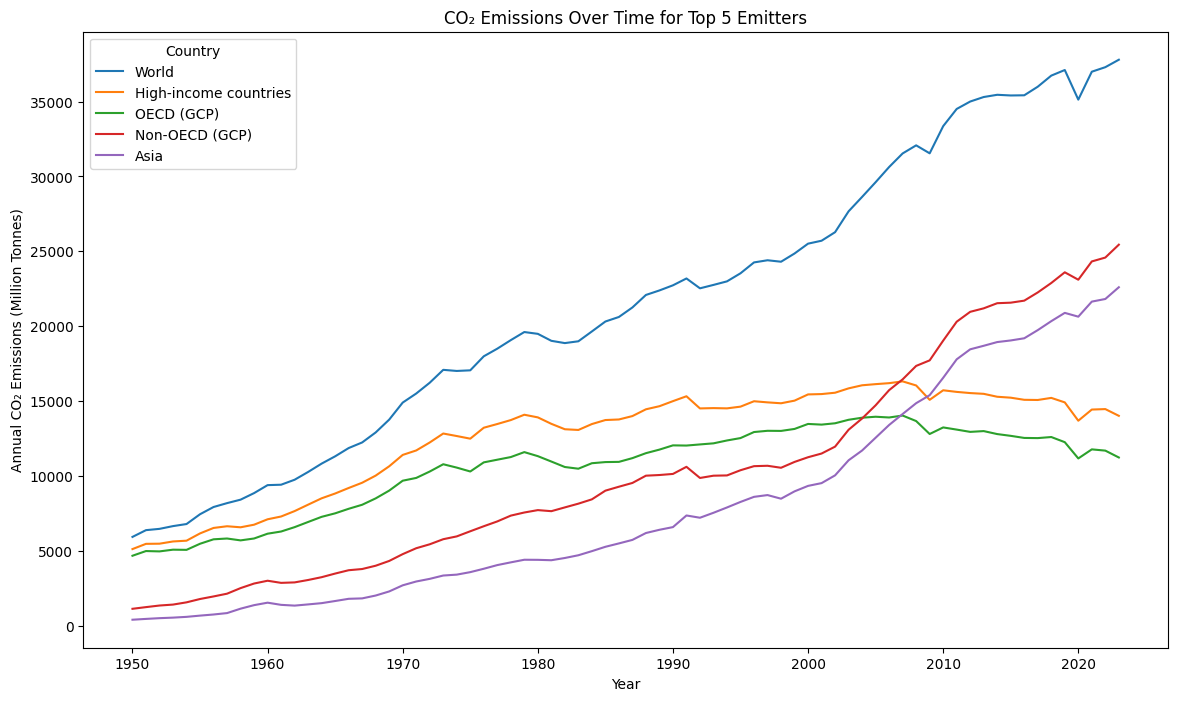

In [20]:
plot_top_emissions(df)

### By Country


Pinged your deployment. You successfully connected to MongoDB!


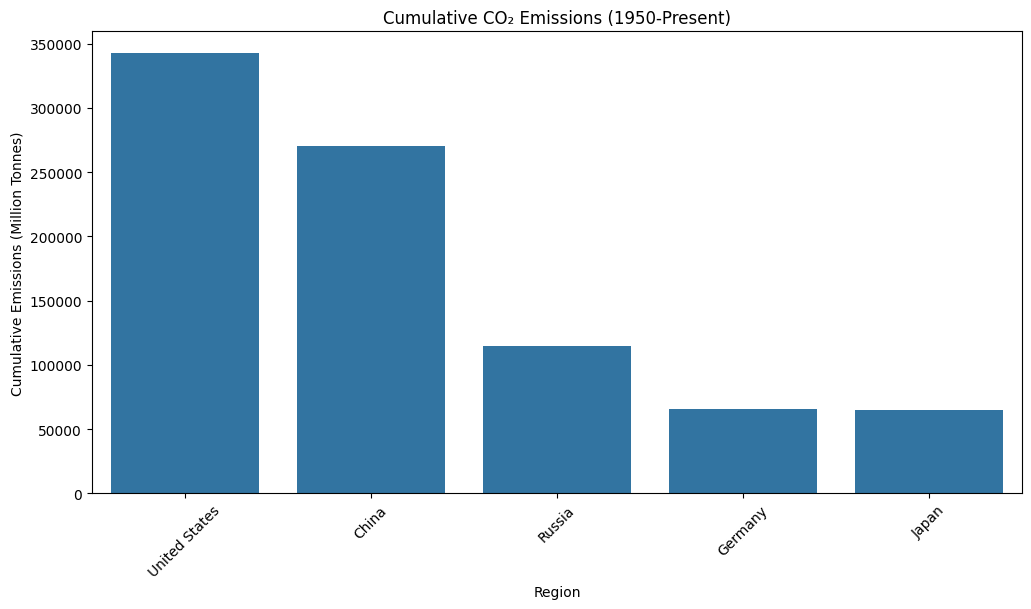

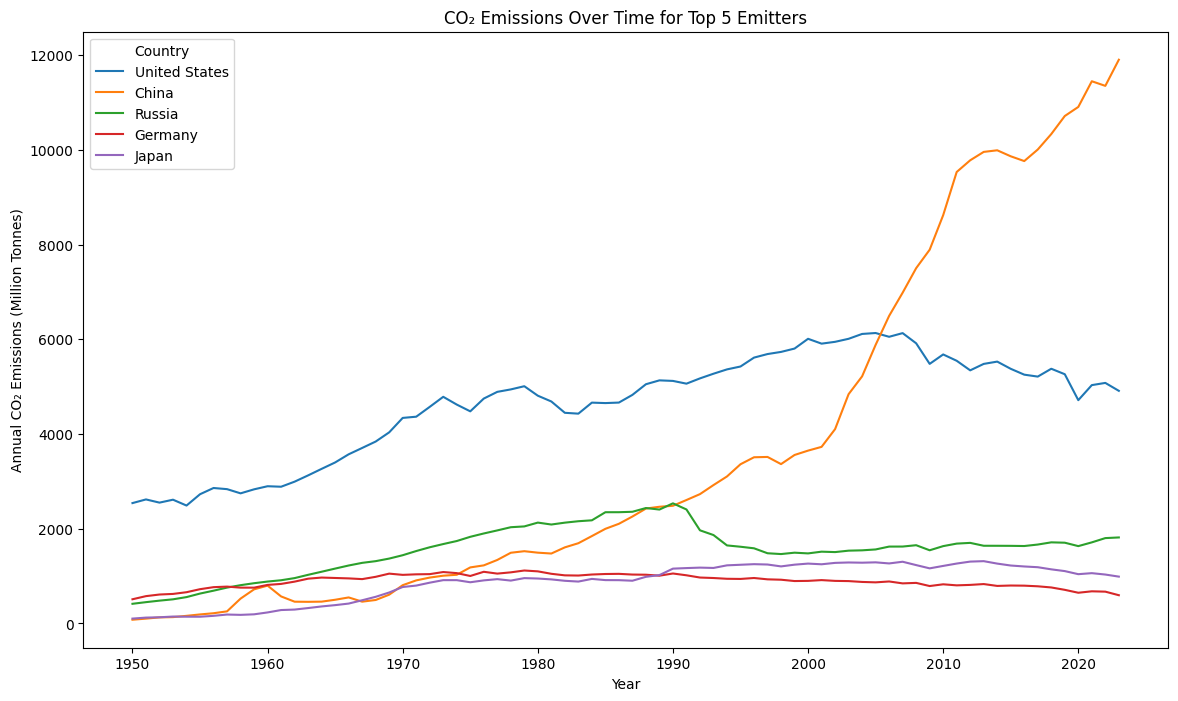

In [21]:
df = get_dataframe_from_cloud(client=client, db_name="data", collection_name="country_data")

plot_top_emissions(df)

### By Continent

Pinged your deployment. You successfully connected to MongoDB!


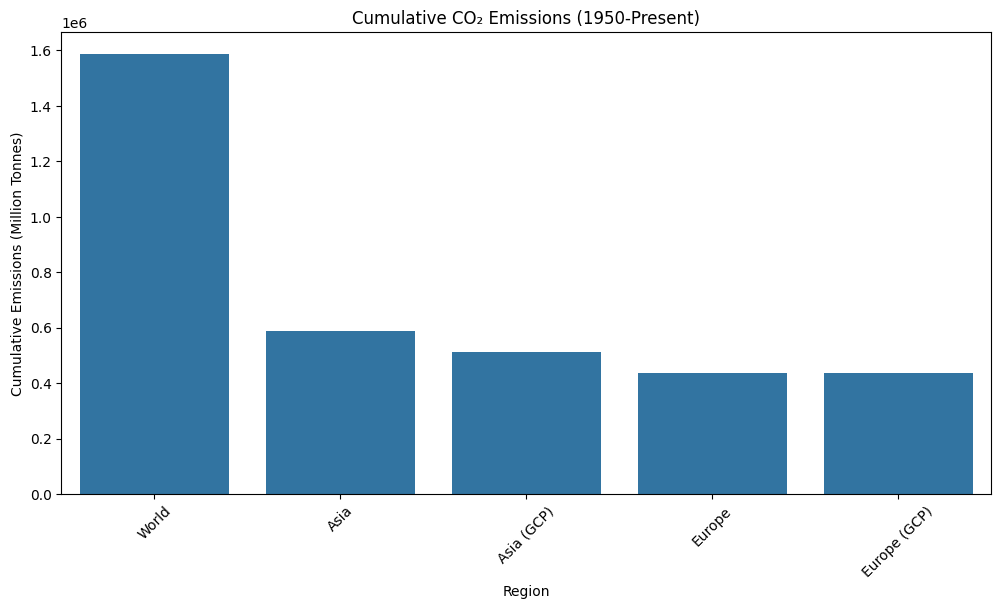

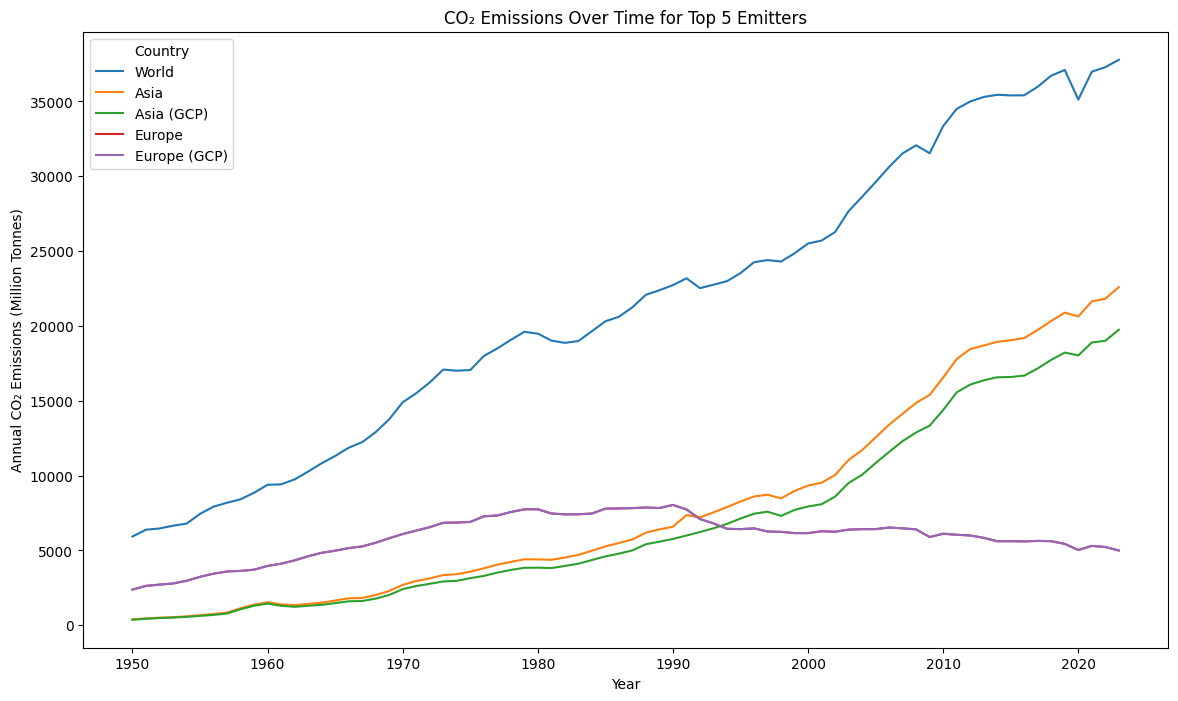

In [22]:
df = get_dataframe_from_cloud(client=client, db_name="data", collection_name="continent_data")

plot_top_emissions(df)

### By Class

Pinged your deployment. You successfully connected to MongoDB!


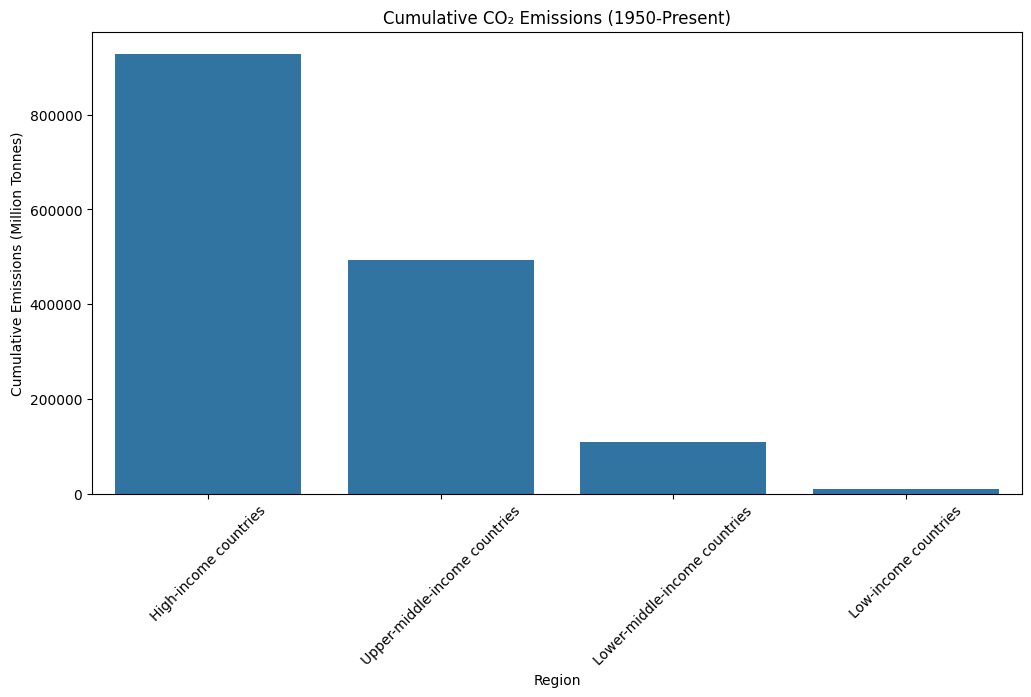

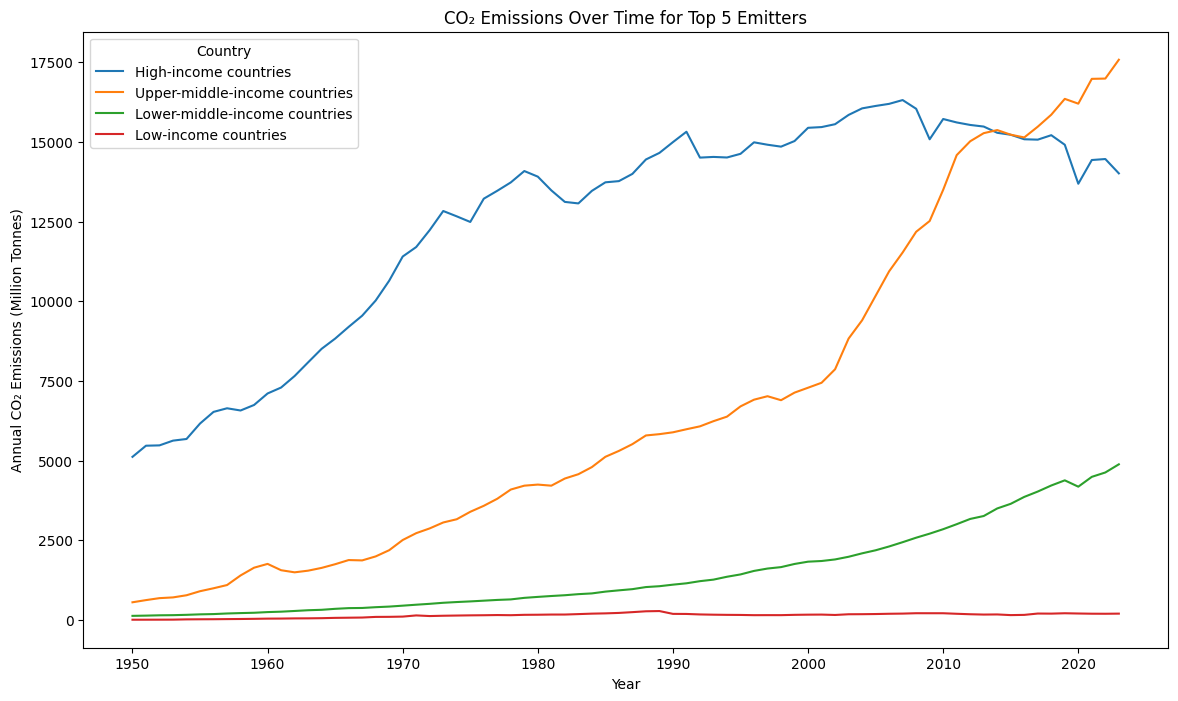

In [23]:
df = get_dataframe_from_cloud(client=client, db_name="data", collection_name="socioeconomic_data")

plot_top_emissions(df)